In [1]:
from IPython.display import display
import ipywidgets as widgets
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
class Tablero:
    def __init__(self, tamano_celda=(50, 50), n_celdas=(5,5)):
        self.out = widgets.HTML()
        display(self.out)
        self.tamano_celda = tamano_celda
        self.n_celdas = n_celdas
        self.casillas = []

    def get_nceldas(self):
        return self.n_celdas

    def get_casillas(self):
        return self.casillas

    def dibujar(self, objetos):
        tablero = "<table border='1' >{}</table>"
        filas = ""
        for i in range(self.n_celdas[0]):
            s = ""
            for j in range(self.n_celdas[1]):
                contenido =""
                self.casillas.append([i, j])
                for o in objetos:
                    if o.x == j and o.y == i:
                        contenido = \
                            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>". \
                                format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)
                s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>". \
                    format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1],
                           contenido = contenido)
            filas += "<tr>{}</tr>".format(s)
        tablero = tablero.format(filas)
        self.out.value = tablero

In [3]:
class Agente():
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30):
        self.x = x
        self.y = y
        self.angulo = angulo
        self.emoticon = emoticon
        self.tamano_emoticon = tamano_emoticon
        

In [4]:
class AgenteBasura(Agente):
    def __init__(self, x=0, y=0, angulo=0, emoticon="🍂", tamano_emoticon=30 ):
        super().__init__(x, y, angulo, emoticon, tamano_emoticon)

In [5]:
def GenerarBasura(cantidad, tablero=Tablero()):
    basuras = []
    while len(basuras)<cantidad:
        x = np.random.randint(tablero.get_nceldas()[0])
        y = np.random.randint(tablero.get_nceldas()[0])
        if not any(basura.x == x and basura.y == y for basura in basuras):
            basuras.append(AgenteBasura(x, y))
    return basuras

HTML(value='')

In [6]:
class AgenteAspiradoraReflejo(Agente):
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, tablero = Tablero(),puntos=0):
        super().__init__(x, y, angulo, emoticon, tamano_emoticon)
        self.tablero = tablero
        self.energia = 100
        self.puntos = puntos
    
    def set_puntos(self, puntos):
        self.puntos = puntos
        
    def get_puntos(self):
        return self.puntos
    
    def dec_energy(self):
        self.energia = self.energia - 1

    def abajo(self):
        if self.y < self.tablero.get_nceldas()[1]-1 :
            self.y += 1
            self.dec_energy()
    
    def derecha(self):
        if self.x < self.tablero.get_nceldas()[0]-1:
            self.x += 1
            self.dec_energy()
    
    def arriba(self):
        if self.y > 0 :
            self.y -= 1
            self.dec_energy()
    
    def izquierda(self):
        if self.x > 0 :
            self.x -= 1
            self.dec_energy()

    def detectar_basura(self, basuras):
        basura_arriba = any(basura.x == self.x and basura.y == self.y - 1 for basura in basuras)
        basura_abajo = any(basura.x == self.x and basura.y == self.y + 1 for basura in basuras)
        basura_izquierda = any(basura.x == self.x - 1 and basura.y == self.y for basura in basuras)
        basura_derecha = any(basura.x == self.x + 1 and basura.y == self.y for basura in basuras)
    
        if basura_derecha:
            self.derecha()
            return True
        elif basura_izquierda:
            self.izquierda()
            return True
        elif basura_arriba:
            self.arriba()
            return True
        elif basura_abajo:
            self.abajo()
            return True
        return False

    def limpiar(self, basuras):
        founded_basura = filter(lambda basura: (basura.x == self.x and basura.y == self.y ), basuras)
        basura = list(founded_basura)
        if basura:
            basuras.remove(basura[0])
            self.set_puntos(self.get_puntos()+1)
            return True
        return False

HTML(value='')

In [7]:
def simulacionReflejo(sleep_time=0.5):
    basuras = GenerarBasura(cantidad=10)
    aspiradora = AgenteAspiradoraReflejo()
    movimientos = [aspiradora.derecha, aspiradora.izquierda, aspiradora.arriba, aspiradora.abajo]
    while aspiradora.energia > 0 and len(basuras) != 0:
        aspiradora.limpiar(basuras)
        objetos = basuras + [aspiradora]
        escenario.dibujar(objetos)
        time.sleep(sleep_time)
        if aspiradora.energia > 0:
            if not aspiradora.detectar_basura(basuras):
                np.random.choice(movimientos)()
        else:
            break
        escenario.dibujar(objetos)
        time.sleep(sleep_time)
    return 100-aspiradora.energia,aspiradora.puntos

In [10]:
Energia_Consumida =[]
Puntos_Obtenidos=[]
escenario=Tablero()
for _ in range(50):
    energia,puntos=simulacionReflejo(0.01)
    Energia_Consumida.append(energia)
    Puntos_Obtenidos.append(puntos)

HTML(value='')

KeyboardInterrupt: 

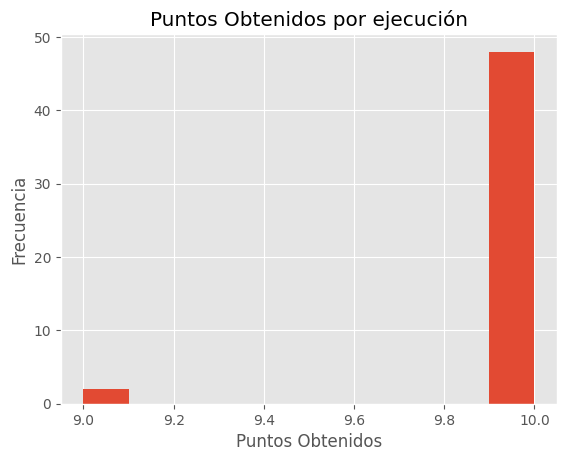

In [54]:
plt.hist(Puntos_Obtenidos)
plt.title("Puntos Obtenidos por ejecución")
plt.xlabel("Puntos Obtenidos")
plt.ylabel("Frecuencia")
plt.show()

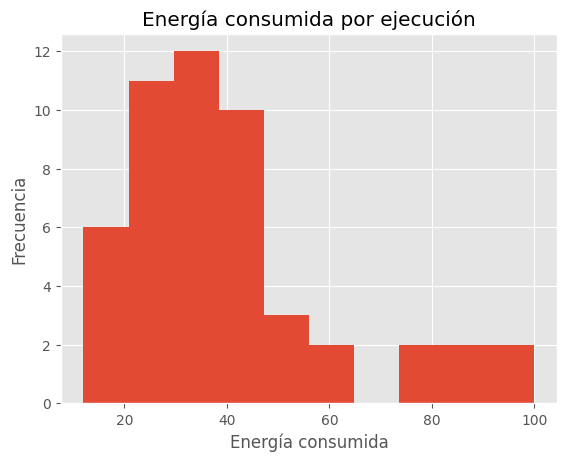

In [55]:
plt.hist(Energia_Consumida)
plt.title("Energía consumida por ejecución")
plt.xlabel("Energía consumida")
plt.ylabel("Frecuencia")
plt.show()

In [191]:
class AgenteAspiradoraReflejoMemoria(Agente):
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, tablero = Tablero(n_celdas=(10,10)), celdas_visitadas=None,puntos=0):
        super().__init__(x, y, angulo, emoticon, tamano_emoticon)
        if celdas_visitadas is None:
            celdas_visitadas = []
        self.tablero = tablero
        self.energia = 200
        self.celdas_visitadas = celdas_visitadas
        self.puntos = puntos

    def set_puntos(self, puntos):
        self.puntos = puntos

    def get_puntos(self):
        return self.puntos

    def dec_energy(self):
        self.energia = self.energia - 1
        
    def IsVisited(self,celda):
        if celda in self.celdas_visitadas:
            return True
        else: return False
    def IdentificarBorde(self):
        if self.x==0: 
            return 1
        elif self.x == self.tablero.get_nceldas()[0]-1:
            return 2
        elif self.y == self.tablero.get_nceldas()[1]-1:
            return 3
        elif self.y == 0:
            return 4
        else: return 0
    def Encerrado(self):
        derecha=(self.x+1,self.y) in self.celdas_visitadas
        izquierda=(self.x-1,self.y) in self.celdas_visitadas
        arriba=(self.x,self.y-1) in self.celdas_visitadas
        abajo=(self.x,self.y+1) in self.celdas_visitadas
        arriba_izquierda=(self.x-1,self.y-1) in self.celdas_visitadas
        arriba_derecha=(self.x+1,self.y-1) in self.celdas_visitadas
        abajo_derecha=(self.x+1,self.y+1) in self.celdas_visitadas
        abajo_izquierda=(self.x-1,self.y+1) in self.celdas_visitadas
        if (self.x,self.y)==(0,0):
            return abajo and derecha and abajo_derecha
        elif (self.x,self.y)==(self.tablero.get_nceldas()[0]-1,0):
            return abajo and izquierda and abajo_izquierda
        elif (self.x,self.y)==(self.tablero.get_nceldas()[0]-1,self.tablero.get_nceldas()[1]-1):
            return arriba and izquierda and arriba_izquierda
        elif (self.x,self.y)==(0,self.tablero.get_nceldas()[1]-1):
            return arriba and derecha and arriba_derecha
        else:
            match self.IdentificarBorde():
                case 0:
                    return derecha and izquierda and arriba and abajo and arriba_izquierda and abajo_derecha and arriba_derecha and abajo_izquierda
                case 1:
                    return derecha and arriba and abajo_derecha and arriba and abajo 
                case 2:
                    return izquierda and arriba and abajo and arriba_izquierda and abajo_izquierda
                case 3: 
                    return izquierda and arriba and derecha and arriba_izquierda and arriba_derecha
                case 4:
                    return izquierda and abajo and derecha and abajo_derecha and abajo_izquierda
                    
    def abajo(self):
        if self.y < self.tablero.get_nceldas()[1]-1:
            if not self.IsVisited((self.x,self.y+1)) or self.Encerrado():
                self.y += 1
                self.dec_energy()

    def derecha(self):
        if self.x < self.tablero.get_nceldas()[0]-1:
            if not self.IsVisited((self.x+1,self.y)) or self.Encerrado():
                self.x += 1
                self.dec_energy()

    def arriba(self):
        if self.y > 0 :
            if not self.IsVisited((self.x,self.y-1)) or self.Encerrado():
                self.y -= 1
                self.dec_energy()

    def izquierda(self):
        if self.x > 0 :
            if not self.IsVisited((self.x-1,self.y)) or self.Encerrado():
                self.x -= 1
                self.dec_energy()
                
    def abajo_der(self):
        if self.y < self.tablero.get_nceldas()[1]-1 and self.x < self.tablero.get_nceldas()[0]-1:
            if not self.IsVisited((self.x+1,self.y+1)) or self.Encerrado():
                self.y += 1
                self.x += 1
                self.dec_energy()

    def arriba_der(self):
        if self.x < self.tablero.get_nceldas()[0]-1 and self.y > 0:
            if not self.IsVisited((self.x+1,self.y-1)) or self.Encerrado():
                self.x += 1
                self.y -= 1
                self.dec_energy()

    def arriba_izq(self):
        if self.y > 0 and self.x > 0 :
            if not self.IsVisited((self.x-1,self.y-1)) or self.Encerrado():
                self.x -= 1
                self.y -= 1
                self.dec_energy()
                

    def abajo_izq(self):
        if self.x > 0 and self.y < self.tablero.get_nceldas()[1]-1 :
            if not self.IsVisited((self.x-1,self.y+1)) or self.Encerrado():
                self.x -= 1
                self.y += 1
                self.dec_energy()
    

    def detectar_basura(self, basuras):
        basura_arriba = any(basura.x == self.x and basura.y == self.y - 1 for basura in basuras)
        basura_abajo = any(basura.x == self.x and basura.y == self.y + 1 for basura in basuras)
        basura_izquierda = any(basura.x == self.x - 1 and basura.y == self.y for basura in basuras)
        basura_derecha = any(basura.x == self.x + 1 and basura.y == self.y for basura in basuras)
        basura_arriba_der = any(basura.x == self.x + 1 and basura.y == self.y - 1 for basura in basuras)
        basura_abajo_der = any(basura.x == self.x + 1 and basura.y == self.y + 1 for basura in basuras)
        basura_arriba_izq = any(basura.x == self.x - 1 and basura.y == self.y - 1 for basura in basuras)
        basura_abajo_izq = any(basura.x == self.x - 1 and basura.y == self.y + 1 for basura in basuras)
        
        if basura_derecha:
            self.derecha()
            return True
        elif basura_izquierda:
            self.izquierda()
            return True
        elif basura_arriba:
            self.arriba()
            return True
        elif basura_abajo:
            self.abajo()
            return True
        if basura_arriba_der:
            self.arriba_der()
            return True
        elif basura_abajo_der:
            self.abajo_der()
            return True
        elif basura_arriba_izq:
            self.arriba_izq()
            return True
        elif basura_abajo_izq:
            self.abajo_izq()
            return True
        return False

    def limpiar(self, basuras):
        founded_basura = filter(lambda basura: (basura.x == self.x and basura.y == self.y ), basuras)
        basura = list(founded_basura)
        if basura:
            basuras.remove(basura[0])
            self.set_puntos(self.get_puntos()+1)
            self.celdas_visitadas.append((self.x,self.y))
            return True
        return False

HTML(value='')

In [189]:
def simulacionReflejoMemoria(sleep_time=0.01):
    basuras = GenerarBasura(cantidad=50,tablero=Tablero(n_celdas=(10,10)))
    aspiradora = AgenteAspiradoraReflejoMemoria()
    movimientos = [aspiradora.derecha, aspiradora.izquierda, aspiradora.arriba, 
                   aspiradora.abajo,aspiradora.arriba_der,aspiradora.arriba_izq,
                   aspiradora.abajo_der,aspiradora.abajo_izq]
    while aspiradora.energia > 0 and len(basuras) != 0:
        objetos = basuras + [aspiradora]
        escenario.dibujar(objetos)
        time.sleep(sleep_time)
        if aspiradora.energia > 0:
            if not aspiradora.detectar_basura(basuras):
                np.random.choice(movimientos)()
            else:
                aspiradora.limpiar(basuras)
        else:
            break
        escenario.dibujar(objetos)
        time.sleep(sleep_time)
    return 200-aspiradora.energia,aspiradora.puntos

In [192]:
Energia_Consumida =[]
Puntos_Obtenidos=[]
escenario=Tablero(n_celdas=(10,10))
for _ in range(50):
    energia,puntos=simulacionReflejoMemoria(sleep_time=0.001)
    Energia_Consumida.append(energia)
    Puntos_Obtenidos.append(puntos)

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

HTML(value='')

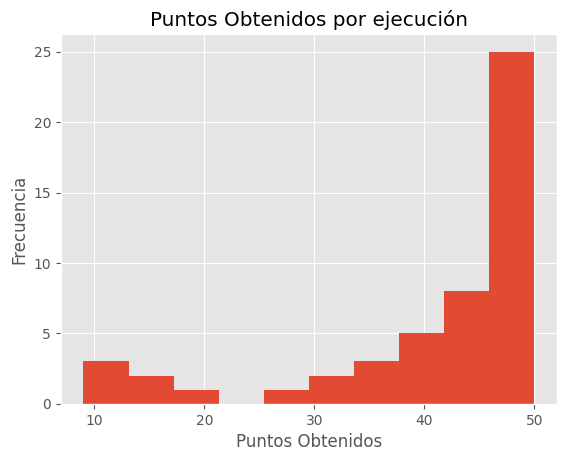

In [193]:
plt.hist(Puntos_Obtenidos)
plt.title("Puntos Obtenidos por ejecución")
plt.xlabel("Puntos Obtenidos")
plt.ylabel("Frecuencia")
plt.show()

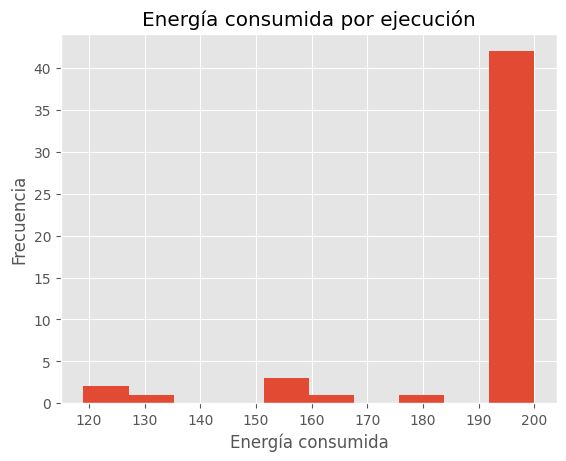

In [194]:
plt.show()
plt.hist(Energia_Consumida)
plt.title("Energía consumida por ejecución")
plt.xlabel("Energía consumida")
plt.ylabel("Frecuencia")
plt.show()